<a href="https://colab.research.google.com/github/gilbertsimbolon/aplikasi-login/blob/main/Selamat_Datang_di_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mengunggah dataset yang dibutuhkan.**

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload file reviews.csv

Saving 20191002-reviews.csv to 20191002-reviews.csv


# **Melihat struktur dataset.**

In [2]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('20191002-reviews.csv')

# Menampilkan informasi dan contoh data
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23399 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB
None


,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


# **Membuat label sentimen.**

In [14]:
# membuat label sentimen (1 = positif, 0 = negatif)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)

# menghapus data kosong di kolom reviewContent
df_cleaned = df.dropna(subset=['reviewContent'])

# cek hasil pembersihan
print(f"Jumlah data setelah pembersihan: {len(df_cleaned)}")
df_cleaned[['reviewContent', 'rating', 'sentiment']].head()

Jumlah data setelah pembersihan: 107029


,reviewContent,rating,sentiment
0,bagus mantap dah sesui pesanan,5,1
1,"Bagus, sesuai foto",4,1
2,okkkkk mantaaaaaaapppp ... goood,5,1
3,bagus sesuai,4,1
7,bima,1,0


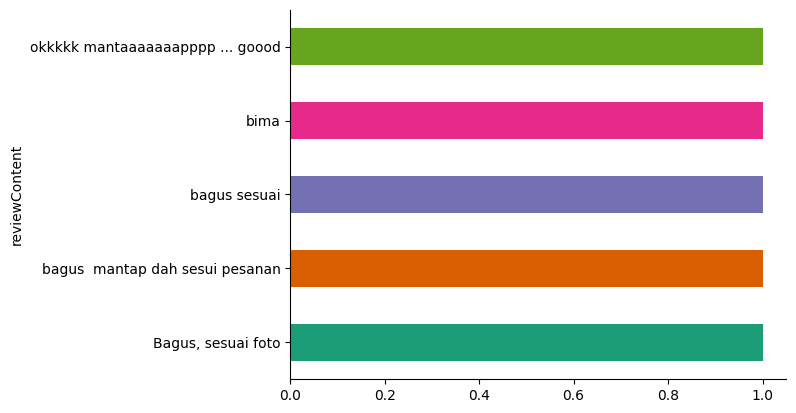

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('reviewContent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

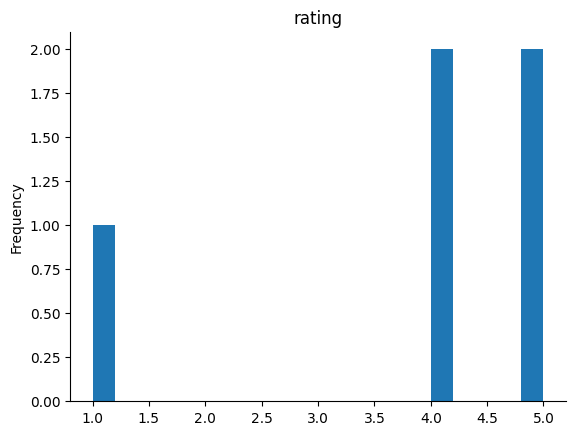

In [12]:
from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# Hitung jumlah ulasan positif dan negatif
sentiment_counts = df_cleaned['sentiment'].value_counts()

labels = ['Positif', 'Negatif']
sizes = [sentiment_counts[1], sentiment_counts[0]]


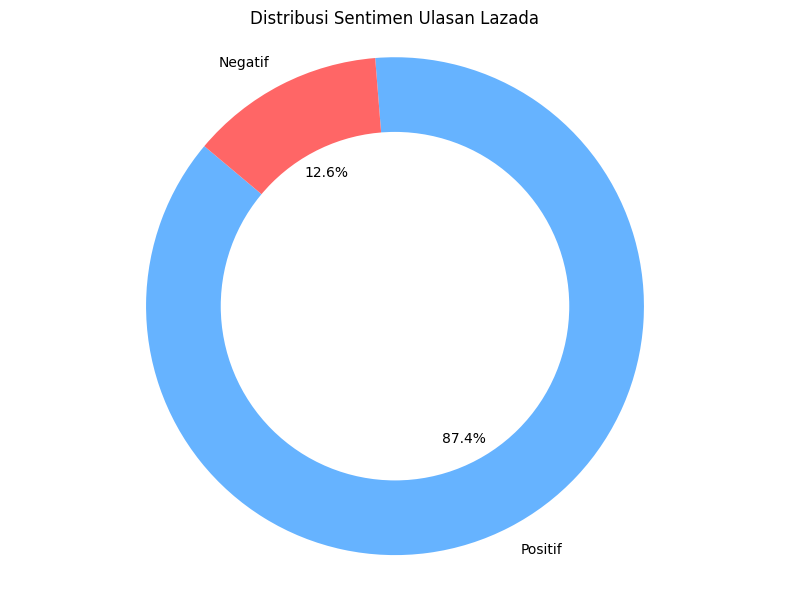

In [11]:
# Membuat donut chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff6666'])

# Menambahkan lingkaran tengah untuk membuat lubang donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribusi Sentimen Ulasan Lazada')
plt.axis('equal')  # Agar lingkaran tidak lonjong
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

# Menampilkan metrik evaluasi tambahan: Precision, Recall, dan F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif']))


Akurasi model: 93.92%

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.85      0.63      0.72      2670
     Positif       0.95      0.98      0.97     18736

    accuracy                           0.94     21406
   macro avg       0.90      0.81      0.84     21406
weighted avg       0.94      0.94      0.94     21406



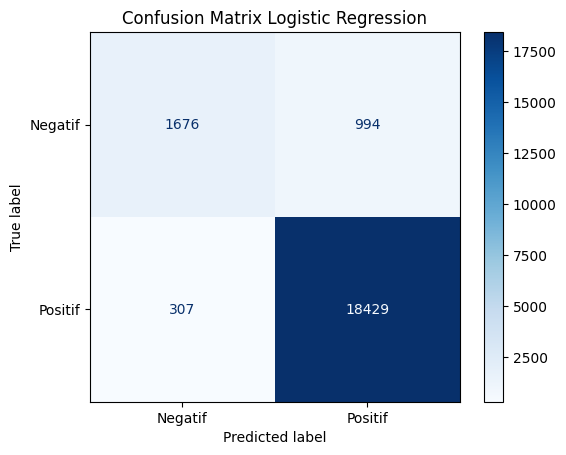

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif', 'Positif'])
disp.plot(cmap='Blues')

# Memberikan judul pada grafik
plt.title('Confusion Matrix Logistic Regression')
plt.show()


# **Vektorisasi teks.**

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Maksimal 5000 kata unik
X = vectorizer.fit_transform(df_cleaned['reviewContent'])

# Menyiapkan label
y = df_cleaned['sentiment']

# Tampilkan jumlah fitur
print(f"Jumlah fitur (kata unik): {X.shape[1]}")

Jumlah fitur (kata unik): 5000


In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")


Akurasi model: 93.92%


# **Membagi data untuk pelatihan dan uji**

In [6]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Melatih model logistic regression.**

In [7]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# **Evaluasi model.**

In [8]:
from sklearn.metrics import accuracy_score

# Prediksi data uji
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")


Akurasi model: 93.92%
